<a href="https://colab.research.google.com/github/ucaokylong/Pytorch_self_learning/blob/main/Pytorch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3:"fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"
                      }


what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
import torch.nn as nn #all of Pytorch's building blocks for neuron network
import matplotlib.pyplot as plt 

torch.__version__

'2.0.1+cu118'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Video
* Audio like songs or podcasts or sound
* DNA
* Text

Two parts are important in Machine Learning:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

In [ ]:
#Create *known* parameters

weight = 0.6 
bias = 1.4

#Create
start = 0.8
end = 5
step = 0.057
X = torch.arange(start, end ,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.8000],
         [0.8570],
         [0.9140],
         [0.9710],
         [1.0280],
         [1.0850],
         [1.1420],
         [1.1990],
         [1.2560],
         [1.3130]]),
 tensor([[1.8800],
         [1.9142],
         [1.9484],
         [1.9826],
         [2.0168],
         [2.0510],
         [2.0852],
         [2.1194],
         [2.1536],
         [2.1878]]),
 74,
 74)

In [ ]:
#Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[: train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_test)

15

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  
  plt.figure(figsize = (10,7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s =4, label = "Training data")

  plt.scatter(test_data, test_labels, c= "g", s =4, label ="Testing data")
  
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s =4, label = "Predictions")

    plt.legend(prop ={"size": 14} );

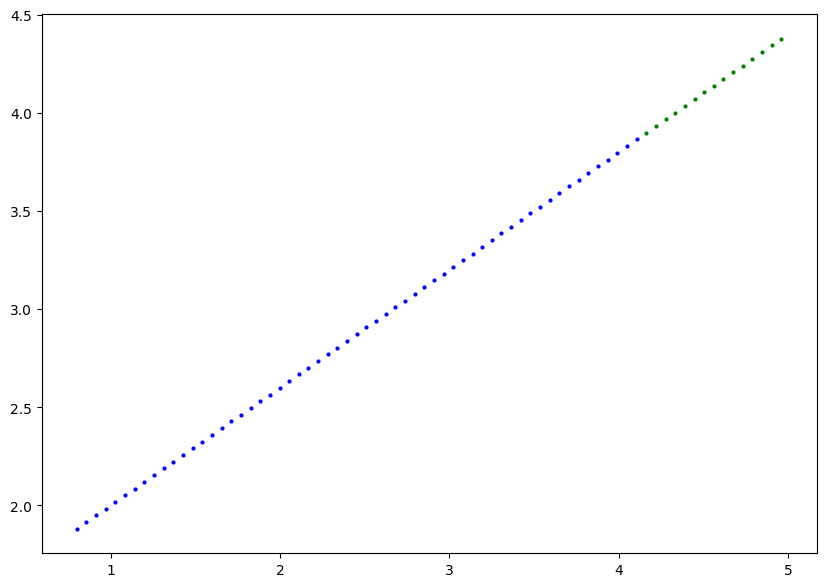

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

# ***BUILD MODEL***
First Pytorch model

In [7]:
# Create Linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    
    #Forward method to define the computation in the model

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [8]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.to(device)

LinearRegressionModel()

In [10]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])

In [26]:
##Making prediction using `torch.inference_mode()`

with torch.inference_mode():
  X_test = X_test.to(device)
  y_preds = model_0(X_test)

y_preds
y_preds = y_preds.cpu().numpy()

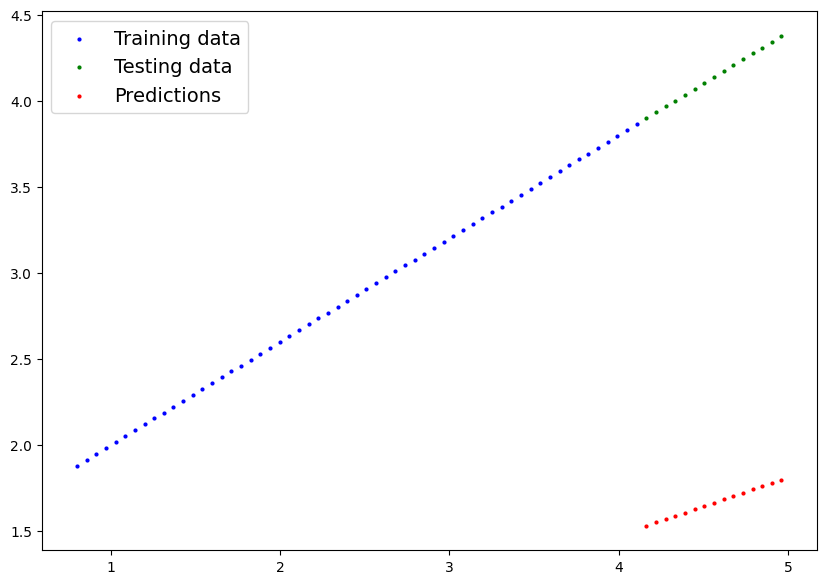

In [27]:


plot_predictions(predictions = y_preds)

In [28]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.1288], device='cuda:0', requires_grad=True)]

In [29]:
#Setup a loss function
loss_fn = nn.L1Loss() 

#Setup an optimizer function
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01 )

In [30]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.3367], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.1288], device='cuda:0', requires_grad=True)]

#Building a training loop in PyTorch


In [35]:
epochs =400
epoch_count = []
loss_values = []
test_loss_values =[]

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):

  #Training mode
  model_0.train()

  #1. Forward pass
  y_pred = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Backpropagation
  loss.backward()

  #5. Step the optimizer
  optimizer.step()
  #model_0.eval()

  #Testing
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 20 ==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    if epoch % 50 ==0:
      print(f"Epoch: {epoch} | Loss: {loss}  |  Test loss: {test_loss}")
model_0.state_dict()

Epoch: 0 | Loss: 0.015397241339087486  |  Test loss: 0.1244557797908783
Epoch: 100 | Loss: 0.015397241339087486  |  Test loss: 0.1244557797908783
Epoch: 200 | Loss: 0.015397241339087486  |  Test loss: 0.1244557797908783
Epoch: 300 | Loss: 0.015397241339087486  |  Test loss: 0.1244557797908783


OrderedDict([('weights', tensor([0.6085], device='cuda:0')),
             ('bias', tensor([1.3637], device='cuda:0'))])

In [36]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6085], device='cuda:0')),
             ('bias', tensor([1.3637], device='cuda:0'))])

In [37]:
import numpy as np
np.array(torch.tensor(loss_values).numpy())

array([0.01539724, 0.01539724, 0.01539724, 0.01539724, 0.01539724,
       0.01539724, 0.01539724, 0.01539724, 0.01539724, 0.01539724,
       0.01539724, 0.01539724, 0.01539724, 0.01539724, 0.01539724,
       0.01539724, 0.01539724, 0.01539724, 0.01539724, 0.01539724],
      dtype=float32)

In [40]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)


y_pred_new = y_pred_new.cpu().numpy()

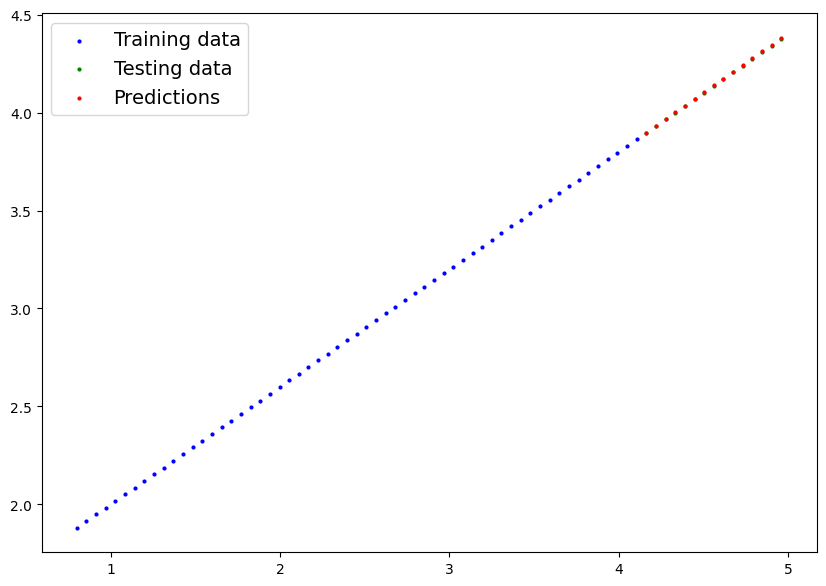

In [41]:
plot_predictions(predictions = y_pred_new)

In [42]:
#Saving model
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)
MODEL_NAME ="Pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

PosixPath('models/Pytorch_workflow_model.pth')

In [43]:
torch.save(obj = model_0.state_dict(),
           f=MODEL_SAVE_PATH)

In [44]:
loaded_model_0 = LinearRegressionModel()

In [45]:
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [50]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6085])), ('bias', tensor([1.3637]))])